Mustafa Yesilyurt, CS 178, Prof. Alexander Ihler, HW 1, 10/9/19

## Problem 1: Python & Data Exploration

In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None)  # load the text file
Y = iris[:,-1]              # target value (iris species) is the last column
X = iris[:,0:-1]            # features are the other columns

First question: Use X.shape to get the number of features and the number of data points. Report both numbers, mentioning which number is which. (5 points)

In [2]:
print(X.shape)
print('The first parameter is the number of data points and the second is the number of features.')

(148, 4)
The first parameter is the number of data points and the second is the number of features.


Second question: For each feature, plot a histogram (plt.hist) of the data values.  (5 points)

histogram for feature 1


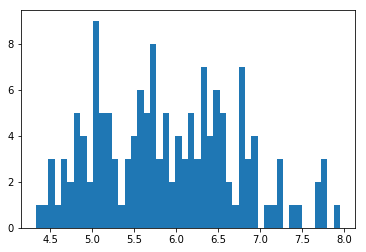

histogram for feature 2


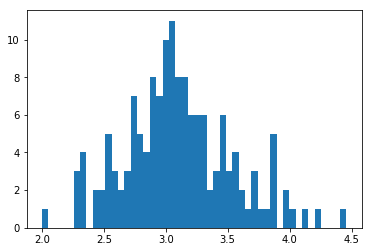

histogram for feature 3


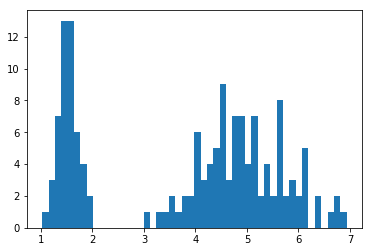

histogram for feature 4


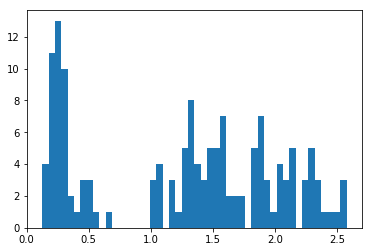

In [3]:
for ind in range(4):
    print('histogram for feature ' + str(ind+1))
    plt.hist(X[:, ind], bins=48)
    plt.show()

Third question: Compute the mean & standard deviation of the data points for each feature (np.mean,np.std).(5 points)

In [4]:
for ind in range(4):
    print('mean for feature ' + str(ind+1))
    print(str(np.mean(X[:, ind])))
    print('standard deviation for feature ' + str(ind+1))
    print(str(np.std(X[:, ind])))
    print()

mean for feature 1
5.90010376419
standard deviation for feature 1
0.833402066775

mean for feature 2
3.09893091689
standard deviation for feature 2
0.436291838001

mean for feature 3
3.81955484054
standard deviation for feature 3
1.75405710934

mean for feature 4
1.25255548459
standard deviation for feature 4
0.758772457026



Fourth question: For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot (see plt.plot or plt.scatter) of the feature values, colored according to their target value (class). (For example, plot all data points with y=0 as blue,y=1 as green, andy=2 as red.)(5 points)

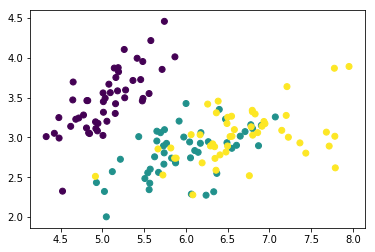

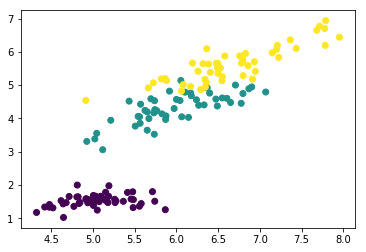

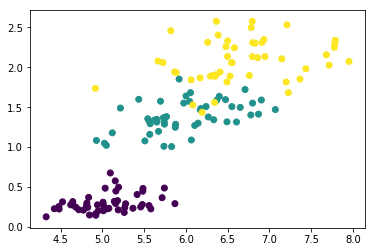

In [4]:
arr = np.array([1, 2, 3])
xfeat = 0
col=np.array(['a','r','g','b'])
for ind in arr:
    plt.scatter(x=X[:, xfeat], y=X[:, ind], c=Y)
    plt.show()
    


## Problem 2: k-nearest-neighbor predictions (25 points)

First problem: Modify the code in the next cell to use only the first two features of X(e.g., let X be only the first two columns of iris, instead of the first four), and visualize (plot) the classification boundary for varying values of K=[1, 5, 10, 50] using plotClassify2D.(10 points)

k = 1


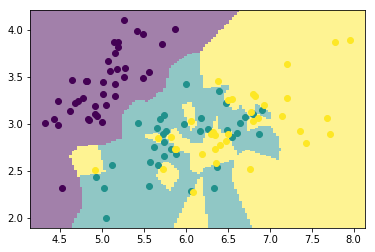

k = 5


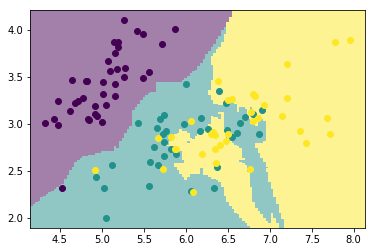

k = 10


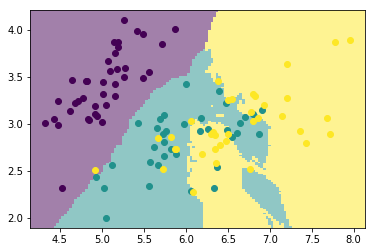

k = 50


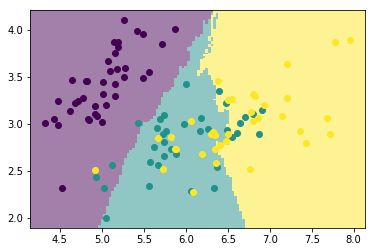

In [6]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)  # load the data
Y = iris[:,-1]
X = iris[:,0:-1]
# Note: indexing with ":" indicates all values (in this case, all rows);
#  indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
#  indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We'll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
#   export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir
# or add it to your path inside Python:
#   import sys
#   sys.path.append('/path/to/parent/dir/');

np.random.seed(0)           # set the random number seed
X,Y = ml.shuffleData(X[:, 0:2],Y);  # shuffle data randomly TAKING ONLY FIRST TWO COLUMNS OF X
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);  # split data into 75/25 train/validation

#----------------------------

#knn = ml.knn.knnClassify()  # create the object and train it
#knn.train(Xtr, Ytr, 1)      # where K is an integer, e.g. 1 for nearest neighbor prediction
#YvaHat = knn.predict(Xva)   # get estimates of y for each data point in Xva

# Alternatively, the constructor provides a shortcut to "train":
#knn = ml.knn.knnClassify( Xtr, Ytr, K );
#YvaHat = predict( knn, Xva );

#----------------------------
print("k = 1")
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 1)
ml.plotClassify2D( knn, Xtr, Ytr );  # make 2D classification plot with data (Xtr,Ytr)
plt.show()
print("k = 5")
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 5)
ml.plotClassify2D( knn, Xtr, Ytr );  # make 2D classification plot with data (Xtr,Ytr)
plt.show()
print("k = 10")
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 10)
ml.plotClassify2D( knn, Xtr, Ytr );  # make 2D classification plot with data (Xtr,Ytr)
plt.show()
print("k = 50")
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 50)
plt.show()
ml.plotClassify2D( knn, Xtr, Ytr );  # make 2D classification plot with data (Xtr,Ytr)
plt.show()

Second question: Again using only the first two features, compute the error rate (number of misclassifications) on both the training and validation data as a function of K=[1,2,5,10,50,100,200]. You can do this most easily with a for-loop:

In [8]:
def funky(Y_1, Y_2):
    count = 0
    for ind in range(len(Y_1)):
        if Y_1[ind] != Y_2[ind]:
            count = count+1
    c = 1.0 * count / len(Y_1)
    return c

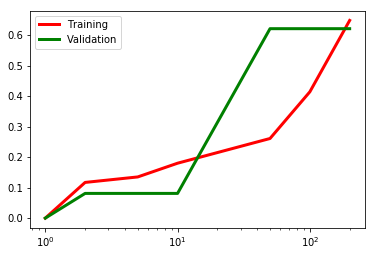

In [9]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)  # load the data
Y = iris[:,-1]
X = iris[:,0:-1]

import mltools as ml
np.random.seed(0)           # set the random number seed
X,Y = ml.shuffleData(X[:, 0:2],Y);  # shuffle data randomly TAKING ONLY FIRST TWO COLUMNS OF X
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);  # split data into 75/25 train/validation

K=[1,2,5,10,50,100,200];
errTrain = [None]*len(K)     # (preallocate storage for training error)
errVal = [None]*len(K)

for i,k in enumerate(K):
    knn = ml.knn.knnClassify(Xtr, Ytr, k)  # TODO: complete code to train model
    Ytrhat = knn.predict(Xtr) # TODO: predict results on training data
    errTrain[i] = funky(Ytr, Ytrhat)      # TODO: count what fraction of predictions are wrong
    
    #TODO: repeat prediction / error evaluation for validation data
    knn2 = ml.knn.knnClassify(Xva, Yva, k)
    Yvahat = knn2.predict(Xva)
    errVal[i] = funky(Yva, Yvahat)
                           
plt.semilogx(K, errTrain,'r-', lw=3, label='Training')
plt.semilogx(K, errVal,'g-', lw=3, label='Validation')     #TODO: average and plot results on semi-log scale
plt.legend()
plt.show()

Third question: Create the same error rate plots as the previous part, but with all the features in the dataset. Are the plots very different? Is your recommendation for the best K different? (5 points)

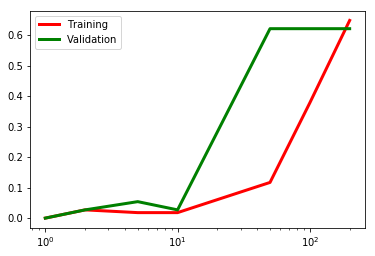

In [10]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)  # load the data
Y = iris[:,-1]
X = iris[:,0:-1]

import mltools as ml
np.random.seed(0)           # set the random number seed
X,Y = ml.shuffleData(X[:,:],Y);  # shuffle data randomly TAKING ONLY FIRST TWO COLUMNS OF X
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);  # split data into 75/25 train/validation

K=[1,2,5,10,50,100,200];
errTrain = [None]*len(K)     # (preallocate storage for training error)
errVal = [None]*len(K)

for i,k in enumerate(K):
    knn = ml.knn.knnClassify(Xtr, Ytr, k)  # TODO: complete code to train model
    Ytrhat = knn.predict(Xtr) # TODO: predict results on training data
    errTrain[i] = funky(Ytr, Ytrhat)      # TODO: count what fraction of predictions are wrong
    
    #TODO: repeat prediction / error evaluation for validation data
    knn2 = ml.knn.knnClassify(Xva, Yva, k)
    Yvahat = knn2.predict(Xva)
    errVal[i] = funky(Yva, Yvahat)
                           
plt.semilogx(K, errTrain,'r-', lw=3, label='Training')
plt.semilogx(K, errVal,'g-', lw=3, label='Validation')     #TODO: average and plot results on semi-log scale
plt.legend()
plt.show()

Across both graphs, the shape (and datapoints) of the validation data's plot remains mostly the same. The only difference is that the value K=5 has a higher number of errors in the second graph than the first. The training data, on the other hand, has far fewer errors in the second graph than in the first leading up to the value of K=100, at which point the two graphs share the same data. With regard to which K value causes the fewest errors, it can be seen that K=1 has the lowest return value, both in the validation data as well as the training data in both plots.